**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree

%matplotlib inline

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
from sklearn.metrics import pairwise_distances

class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X_train = np.asarray(X)
        self.y_train = np.asarray(y)
        return self
    
    def predict_proba(self, X):
        X = np.asarray(X)
        
        if self.algorithm == 'brute':
            dst_mtrx = pairwise_distances(X, self.X_train)
            # indices of min n_neighbors dists for every x in X_test
            indices = np.argpartition(dst_mtrx, 
                                      kth=self.n_neighbors, 
                                      axis=1)[:, :self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            tree = KDTree(self.X_train)
            min_dsts, indices = tree.query(X, k=self.n_neighbors)
            
        # classes for min n_neighbors dists for every x in X_test
        y_proba = np.take_along_axis(self.y_train[np.newaxis, :], 
                                     indices, 
                                     axis=1)        
        return y_proba
    
    def predict(self, X):
        y_proba = self.predict_proba(X) 
        y_pred = np.apply_along_axis(lambda dst: np.bincount(dst).argmax(), 
                                     axis=1, arr=y_proba)
        return y_pred

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

MyKNeighborsClassifier(n_neighbors=2)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 475 µs, sys: 97 µs, total: 572 µs
Wall time: 430 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 16 µs, sys: 3 µs, total: 19 µs
Wall time: 25 µs


MyKNeighborsClassifier(n_neighbors=2)

In [10]:
%time clf.predict(X_test)

CPU times: user 6.34 ms, sys: 0 ns, total: 6.34 ms
Wall time: 4.58 ms


array([0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 1.22 ms, sys: 0 ns, total: 1.22 ms
Wall time: 906 µs


array([0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 1.64 ms, sys: 338 µs, total: 1.98 ms
Wall time: 1.57 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 11 µs, sys: 3 µs, total: 14 µs
Wall time: 17.9 µs


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time clf.predict(X_test)

CPU times: user 4.97 ms, sys: 194 µs, total: 5.16 ms
Wall time: 5.14 ms


array([0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 2.51 ms, sys: 42 µs, total: 2.55 ms
Wall time: 1.78 ms


array([0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer(max_df=0.01, min_df=0.00001)
vctrzd_data = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
from sklearn.model_selection import cross_val_score

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
def opt_n_neighbors(X, y, k_rng=np.arange(2, 20), metric='minkowski'):
    mean_scores = []
    for k in k_rng:
        clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
        scores = cross_val_score(clf, X, y, cv=3, 
                                 scoring='accuracy', n_jobs=-1)
        mean_scores.append(np.mean(scores))
    mean_scores = np.array(mean_scores, dtype=float)
    n_neighbors, max_score = k_rng[mean_scores.argmax()], mean_scores.max()
    return n_neighbors, max_score, mean_scores

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.01, min_df=0.00001)
tfidf_data = tfidf_vectorizer.fit_transform(data)

In [27]:
k_rng = np.arange(2, 141)

In [28]:
%%time
n_neighbors, max_score, mean_scores = opt_n_neighbors(X=tfidf_data, y=target, k_rng=k_rng, metric='cosine')

CPU times: user 1.92 s, sys: 543 ms, total: 2.46 s
Wall time: 2min 28s


In [29]:
n_neighbors, max_score

(36, 0.6509647306531521)

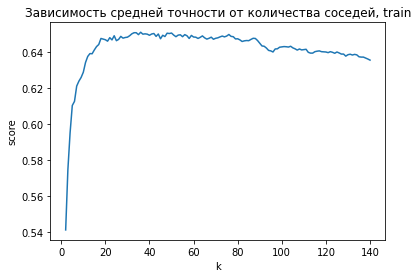

In [30]:
plt.xlabel('k')
plt.ylabel('score')
plt.title('Зависимость средней точности от количества соседей, train')
plt.plot(k_rng, mean_scores)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [31]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [32]:
test_data = newsgroups['data']
test_target = newsgroups['target']

In [33]:
test_tfidf_vectorizer = TfidfVectorizer(max_df=0.01, min_df=0.00001, vocabulary=tfidf_vectorizer.get_feature_names())
test_tfidf_data = tfidf_vectorizer.fit_transform(test_data)

In [34]:
%%time
test_n_neighbors, test_max_score, test_mean_scores = opt_n_neighbors(X=test_tfidf_data, 
                                                                     y=test_target, 
                                                                     k_rng=k_rng, metric='cosine')

CPU times: user 1.75 s, sys: 339 ms, total: 2.09 s
Wall time: 1min 25s


In [35]:
test_n_neighbors, test_max_score

(43, 0.6282526868498395)

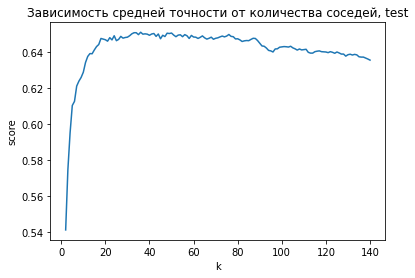

In [36]:
plt.xlabel('k')
plt.ylabel('score')
plt.title('Зависимость средней точности от количества соседей, test')
plt.plot(k_rng, mean_scores)